##### AUCROC computation

### What is AUC-ROC Curve?
###### ref: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/###### https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/###### https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
###### https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- AUC-ROC curve is a performance measurement for classification problem at various thresholds settings.
- ROC is a probability curve
- AUC represents degree or measure of separability - It tells how much model is capable of distinguishing between classes.
- Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

#### ROC  curve plots two parameters:

- True Positive Rate: is a synonym for "Recall" and is therefore defined as follows
TPR = TP/(TP+FN)
- False Positive Rate: is defined as follows
FPR = FP/(FP+TN)

- Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.


## Code to Plot ROC Curve

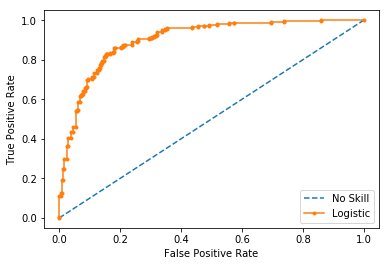

In [10]:
# example of ROC curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# generate 2 class dataset
x, y = make_classification(n_samples = 1000, n_classes = 2, random_state=1)

#split data into train-test sets
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.5, random_state=2)

# fit a model
model = LogisticRegression(solver = 'lbfgs')
model.fit(trainx, trainy)

# predict probabilities
yhat = model.predict_proba(testx)

#retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

# plot no skill roc
pyplot.plot([0, 1], [0, 1], linestyle = '--', label = "No Skill")

# calculate ROC curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)

# plot model roc curve
pyplot.plot(fpr, tpr, marker = '.', label = 'Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

## ROC Area Under Curve (AUC) Score

- Although the ROC Curve is a helpful diagnostic tool, it can be challenging to compare two or more classifiers based on their curves.
- Instead, the area undder the curve can be calculated to give a single score for a classifier model across all threshold values. This is called ROC area under curve or ROC AUC or sometimes ROCAUC.
- The score is a value between 0.0 and 1.0, with 1.0 indicating a perfect classifier.

## Interpretation of AUCROC
 - AUCROC can be interpreted as the probability that the scores given by a classifier will rank a randomly chosen positive instance higher than a randonly chosen negative one.
 - This single score can be used to compare binary classifier models directly. As such, this score might be the most commonly used for comparing classification models for imbalanced problems.
 
 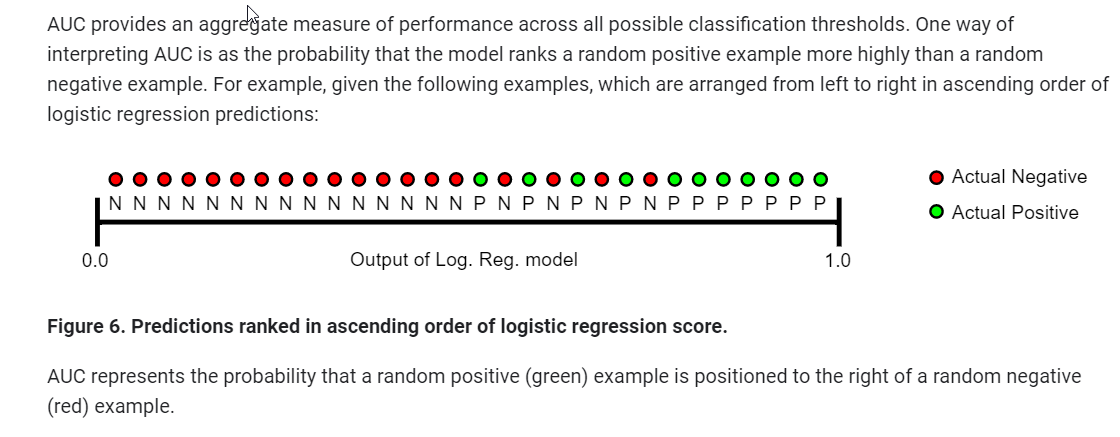

## Code to compute AUCROC score

In [11]:
# example of a roc auc for a predictive model
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# generate two class dataset
x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split data into train-test sets
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.5, random_state=2)

# no skill model, stratified random class predictions
model = DummyClassifier(strategy='stratified')
model.fit(trainx, trainy)
yhat = model.predict_proba(testx)
pos_probs = yhat[:, 1]

# calculate roc auc
roc_auc = roc_auc_score(testy, pos_probs)
print('No Skill ROC AUC %.3f' % roc_auc)

# skilled model
model = LogisticRegression(solver='lbfgs')
model.fit(trainx, trainy)
yhat = model.predict_proba(testx)
pos_probs = yhat[:, 1]

# calculate roc auc
roc_auc = roc_auc_score(testy, pos_probs)
print('Logistic ROC AUC %.3f' % roc_auc)

No Skill ROC AUC 0.468
Logistic ROC AUC 0.903


- Although widely used, the ROC AUC is not without problems. For imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. 
- This is because a small number of correct or incorrect predictoins can result in a large change in the ROC Curve or ROC AUC score.

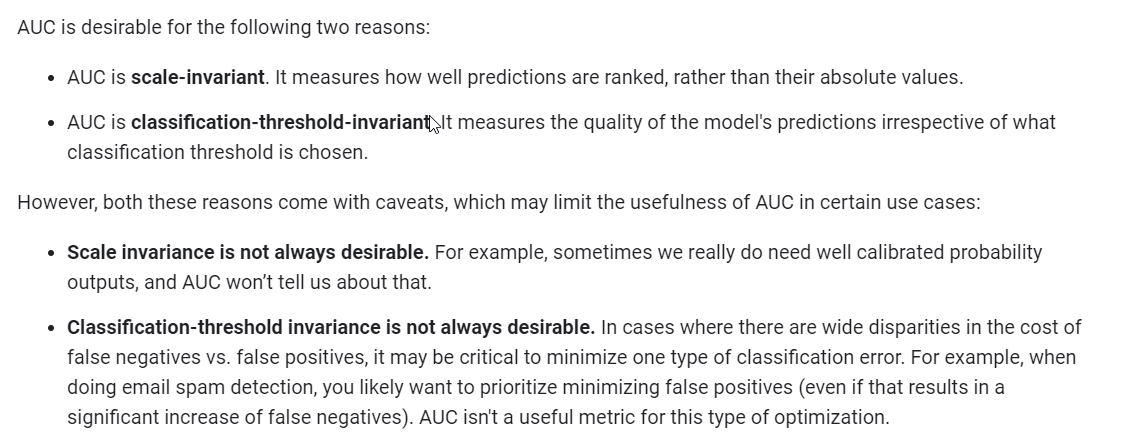